<a href="https://colab.research.google.com/github/Haarrsshhiitt/datapractice1/blob/master/carspred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
cars=pd.read_csv("/content/CarPrice_Assignment.csv")

In [25]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
cars.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [27]:
x = cars.drop(['car_ID','price'],axis=1)
y = cars['price']

In [28]:
categories = list(cars.select_dtypes(['object']))
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categories)], remainder='passthrough')
x = ct.fit_transform(x)

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=None)

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(x_test)

In [39]:
y_test.head()

153     6918.0
185     8195.0
130     9295.0
171    11549.0
68     28248.0
Name: price, dtype: float64

In [40]:
y_pred[0:5]

array([ 7514.48962864,  9177.45876167, 11124.79287737, 15349.47056361,
       26351.26093201])

In [41]:
from sklearn.metrics import mean_squared_error

In [62]:
mn1=mean_squared_error(y_test,y_pred)
mn1

15517938.064953404

In [63]:
import seaborn as sns

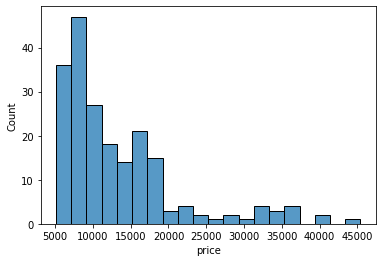

In [64]:
plt.figure(figsize=(6,4))
sns.histplot(data = cars , x ='price',bins = 20)